[-0.20780509 -0.54978318  0.69171046 -0.06814823]
[-0.09122666 -0.68933195 -0.74631435  0.53155022]
[-0.90210913  0.51599814 -0.8790003   0.93151267]
[-0.33706754  0.50127941  0.52852355 -0.23118985]
[-0.87972828  0.02531456  0.37876656  0.25779081]
[-0.44233087  0.4847468   0.52915485 -0.59307042]
[ 0.37043764  0.4746183  -0.21750316 -0.34638011]
[ 0.82940888 -0.58539403  0.01258169 -0.04844753]
[-0.52383184  0.38275566  0.86568542  0.68100057]
[ 0.96770735 -0.48299791  0.75588508  0.53442202]
[ 0.48800017 -0.98488314 -0.46204961 -0.69610669]
[-0.33166633 -0.46940872 -0.95942825  0.1111525 ]
[-0.85094775  0.30344367 -0.39579428 -0.93759129]
[-0.16907007  0.74436947  0.55205269  0.09704136]
[-0.75499867  0.48591057  0.67476683  0.58653612]
[-0.98905701 -0.74378972  0.16924007  0.21732913]
[-0.20155858  0.65094499 -0.82566947 -0.07505845]
[-0.29415694  0.06522923  0.01436282 -0.64972824]
[-0.77174076 -0.6431765  -0.31374403  0.61738505]
[ 0.00418498  0.12909555 -0.0383054   0.64137083]


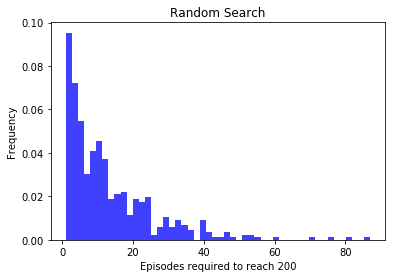

In [1]:
import logging

import gym
import numpy as np
import matplotlib.pyplot as plt


# do not repeat this at home
import gym.envs.registration
gym.envs.registration.logger.setLevel(logging.ERROR)


def run_episode(env, parameters, limit=200):
    observation = env.reset()
    total_reward = 0
    
    for _ in range(limit):
        action = 0 if np.matmul(parameters, observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        total_reward += reward

        if done:
            break

    return total_reward


def train(limit=200):
    env = gym.make('CartPole-v0')
    
    reward = 0
    params = 0
    counter = 0

    while True:
        counter += 1

        current_params = np.random.rand(4) * 2 - 1
        current_reward = run_episode(env, current_params, limit)

        if current_reward > reward:
            reward = current_reward
            params = current_params

            if reward == limit:
                break

    return counter, params


def play(limit=200):
    _, params = train(limit=limit)

    env = gym.make('CartPole-v0')
    env = gym.wrappers.Monitor(env, '/tmp', force=True)
    run_episode(env, params, limit=limit)

    
def evaluate():
    results = [train()[0] for _ in range(500)]
    plt.hist(results, 50, normed=1, facecolor='b', alpha=0.75)

    plt.xlabel('Episodes required to reach 200')
    plt.ylabel('Frequency')
    plt.title('Random Search')

    plt.show()


# play()
evaluate()